# Multivariate with Prophet


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/multi.png" width="1600">


In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/nyc_energy_consumption.csv

--2025-02-03 15:00:10--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/nyc_energy_consumption.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.246.55, 3.5.244.229, 52.95.144.6, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.246.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1867062 (1.8M) [text/csv]
Saving to: ‘nyc_energy_consumption.csv’

nyc_energy_consumpt 100%[===================>]   1.78M  2.55MB/s    in 0.7s    

2025-02-03 15:00:11 (2.55 MB/s) - ‘nyc_energy_consumption.csv’ saved [1867062/1867062]



In [3]:
df = pd.read_csv('nyc_energy_consumption.csv')
df['timeStamp']= pd.to_datetime(df['timeStamp'])
df

timeStamp  demand  precip   temp
0     2012-01-01 00:00:00  4937.5  0.0000  46.13
1     2012-01-01 01:00:00  4752.1  0.0000  45.89
2     2012-01-01 02:00:00  4542.6  0.0000  45.04
3     2012-01-01 03:00:00  4357.7  0.0000  45.03
4     2012-01-01 04:00:00  4275.5  0.0000  42.61
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 4 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [5]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [6]:
printStats(df)

Rows     : 49205
Columns  : 4

 Features 
 ['timeStamp', 'demand', 'precip', 'temp']

 Missing Values 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

 Unique Values 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [7]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_traces(line_color='#000080', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])
                        )
                   )
fig.show()

In [8]:
fig = px.line(df, x = 'timeStamp',y = 'temp',title = 'NYC_Temperature')

fig.update_traces(line_color='#00FF00', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])
                        )
                   )
fig.show()

In [9]:
fig = px.line(df, x = 'timeStamp',y = 'precip',title = 'NYC_Precipitation')

fig.update_traces(line_color='#ff8c00', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])
                        )
                   )
fig.show()

In [10]:
df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [11]:
ny_df =df.set_index('timeStamp')

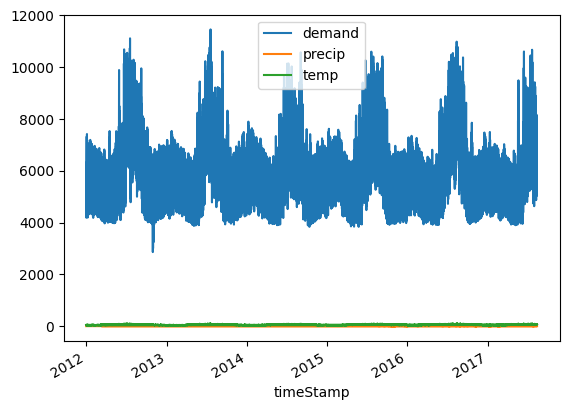

In [ ]:
ny_df.plot();

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

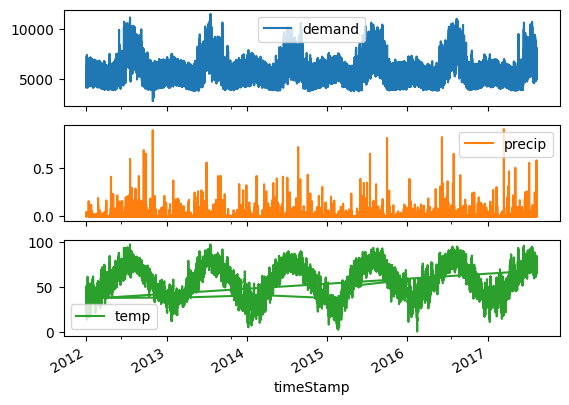

In [12]:
ny_df.plot(subplots = True)

## Resample by Day --> Mean

In [13]:
ny_df_daily = ny_df.resample('D').mean()

In [14]:
ny_df_daily['demand']= ny_df_daily['demand'].fillna(method = 'ffill')
ny_df_daily['temp']= ny_df_daily['temp'].fillna(method = 'ffill')
ny_df_daily['precip']= ny_df_daily['precip'].fillna(method = 'ffill')

ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')
ny_df_final

<ipython-input-14-fdcfec3241aa>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-14-fdcfec3241aa>:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-14-fdcfec3241aa>:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



ds            y       temp
0    2012-01-01  4954.833333  46.510000
1    2012-01-02  5302.954167  40.496667
2    2012-01-03  6095.512500  26.672500
3    2012-01-04  6336.266667  20.585000
4    2012-01-05  6130.245833  33.577500
...         ...          ...        ...
2046 2017-08-08  6471.626042  71.039167
2047 2017-08-09  6811.112167  73.852500
2048 2017-08-10  5582.297000  75.217500
2049 2017-08-11  5582.297000  72.767917
2050 2017-08-12  5582.297000  69.771429

[2051 rows x 3 columns]

In [15]:
ny_df_final['month']= ny_df_final['ds'].dt.month
ny_df_final

ds            y       temp  month
0    2012-01-01  4954.833333  46.510000      1
1    2012-01-02  5302.954167  40.496667      1
2    2012-01-03  6095.512500  26.672500      1
3    2012-01-04  6336.266667  20.585000      1
4    2012-01-05  6130.245833  33.577500      1
...         ...          ...        ...    ...
2046 2017-08-08  6471.626042  71.039167      8
2047 2017-08-09  6811.112167  73.852500      8
2048 2017-08-10  5582.297000  75.217500      8
2049 2017-08-11  5582.297000  72.767917      8
2050 2017-08-12  5582.297000  69.771429      8

[2051 rows x 4 columns]

In [16]:
fig = px.line(ny_df_final, x = 'ds',y = 'y',title = 'NYC_Energy_Consumption Daily', hover_data=['temp','month'])

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])
                        )
                   )
fig.show()

In [17]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
             max       mean        min
month                                 
1      55.420455  33.432140   9.507917
2      59.360000  34.517758   9.015000
3      67.878333  41.419884  20.291667
4      72.992083  52.600204  33.045833
5      82.576250  62.543994  48.090833
6      86.916667  71.334418  52.405833
7      89.606667  77.595627  66.417083
8      87.426250  75.525947  68.042083
9      84.448750  69.550306  57.274583
10     74.277500  58.642895  42.106250
11     67.606250  47.225638  27.172500
12     64.735000  41.520068  22.429583

In [18]:
ny_df_final[['y','temp']].corr()

y      temp
y     1.000000  0.560138
temp  0.560138  1.000000

In [19]:
ny_df_final.query('temp>80')[['y','temp']].corr()

y      temp
y     1.000000  0.552918
temp  0.552918  1.000000

In [20]:
ny_df_final.query('temp<=80')[['y','temp']].corr()

y      temp
y     1.000000  0.469771
temp  0.469771  1.000000

In [21]:
def summer_temp(temp):
  if temp>80:
    return 1
  else:
    return 0

In [22]:
ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'],bins=3,labels=False)
ny_df_final

ds            y       temp  month  summer_temp  month_bins
0    2012-01-01  4954.833333  46.510000      1            0           0
1    2012-01-02  5302.954167  40.496667      1            0           0
2    2012-01-03  6095.512500  26.672500      1            0           0
3    2012-01-04  6336.266667  20.585000      1            0           0
4    2012-01-05  6130.245833  33.577500      1            0           0
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11  5582.297000  72.767917      8            0           1
2050 2017-08-12  5582.297000  69.771429      8            0           1

[2051 rows x 6 columns]

In [23]:
train = ny_df_final[(ny_df_final['ds']>='2012-01-01') & (ny_df_final['ds']<='2017-04-30')]
test = ny_df_final[(ny_df_final['ds']>'2017-04-30')]

print(train.shape)
print(test.shape)

(1947, 6)
(104, 6)


In [ ]:
test

ds            y       temp  month  summer_temp  month_bins
1947 2017-05-01  5417.231583  60.300833      5            0           1
1948 2017-05-02  5697.950042  67.537917      5            0           1
1949 2017-05-03  5354.628500  59.413333      5            0           1
1950 2017-05-04  5235.704833  54.877083      5            0           1
1951 2017-05-05  5358.639500  55.720833      5            0           1
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11  5582.297000  72.767917      8            0           1
2050 2017-08-12  5582.297000  69.771429      8            0           1

[104 rows x 6 columns]

## Multivariate as Multiple-Regressor

In [24]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True,
                )

# add regressor
model.add_regressor('summer_temp',standardize=False)
model.add_regressor('month_bins',standardize=False,mode='multiplicative')

model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpydro4e1o/7_y2iwfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpydro4e1o/er8sl3cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28993', 'data', 'file=/tmp/tmpydro4e1o/7_y2iwfb.json', 'init=/tmp/tmpydro4e1o/er8sl3cu.json', 'output', 'file=/tmp/tmpydro4e1o/prophet_model927d87a0/prophet_model-20250203150845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
model.params

OrderedDict([('lp__', array([[5339.92]])),
             ('k', array([[0.145186]])),
             ('m', array([[0.588993]])),
             ('delta',
              array([[-6.08473e-08, -1.74291e-04, -1.84798e-01, -1.10365e-06,
                       2.80869e-08,  1.40912e-02,  8.05194e-03,  1.10844e-02,
                       3.89223e-03,  8.65245e-04, -2.12610e-08, -5.18877e-02,
                       6.31308e-09,  1.87150e-06,  1.38317e-01,  6.01324e-04,
                      -6.72531e-08, -9.52036e-02, -3.95509e-02,  2.17609e-07,
                       1.86624e-07, -1.59191e-07,  3.58926e-02,  2.53746e-02,
                       9.95629e-07]])),
             ('sigma_obs', array([[0.0388099]])),
             ('beta',
              array([[-0.0354081 , -0.0591315 ,  0.049488  ,  0.0401483 , -0.00951542,
                      -0.00176697, -0.00777387, -0.00252371,  0.00344382, -0.00585576,
                       0.00139808,  0.00306113, -0.00524141, -0.00380363,  0.00338019,
           

In [26]:
future = model.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [27]:
future['summer_temp']=ny_df_final['summer_temp']
future['month_bins']=ny_df_final['month_bins']
future

ds  summer_temp  month_bins
0    2012-01-01            0           0
1    2012-01-02            0           0
2    2012-01-03            0           0
3    2012-01-04            0           0
4    2012-01-05            0           0
...         ...          ...         ...
2046 2017-08-08            0           1
2047 2017-08-09            0           1
2048 2017-08-10            0           1
2049 2017-08-11            0           1
2050 2017-08-12            0           1

[2051 rows x 3 columns]

In [28]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7380.432382  6647.946161  8186.707142
2047 2017-08-09  7391.261337  6595.777784  8221.068978
2048 2017-08-10  7361.586832  6571.624841  8095.391888
2049 2017-08-11  7311.392866  6557.160502  8102.704724
2050 2017-08-12  6730.517104  5905.404098  7490.600998

In [29]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout(
                  yaxis_title="Energy Demand",
                  xaxis_title="Data",
                  title="NYC Energy Demand",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

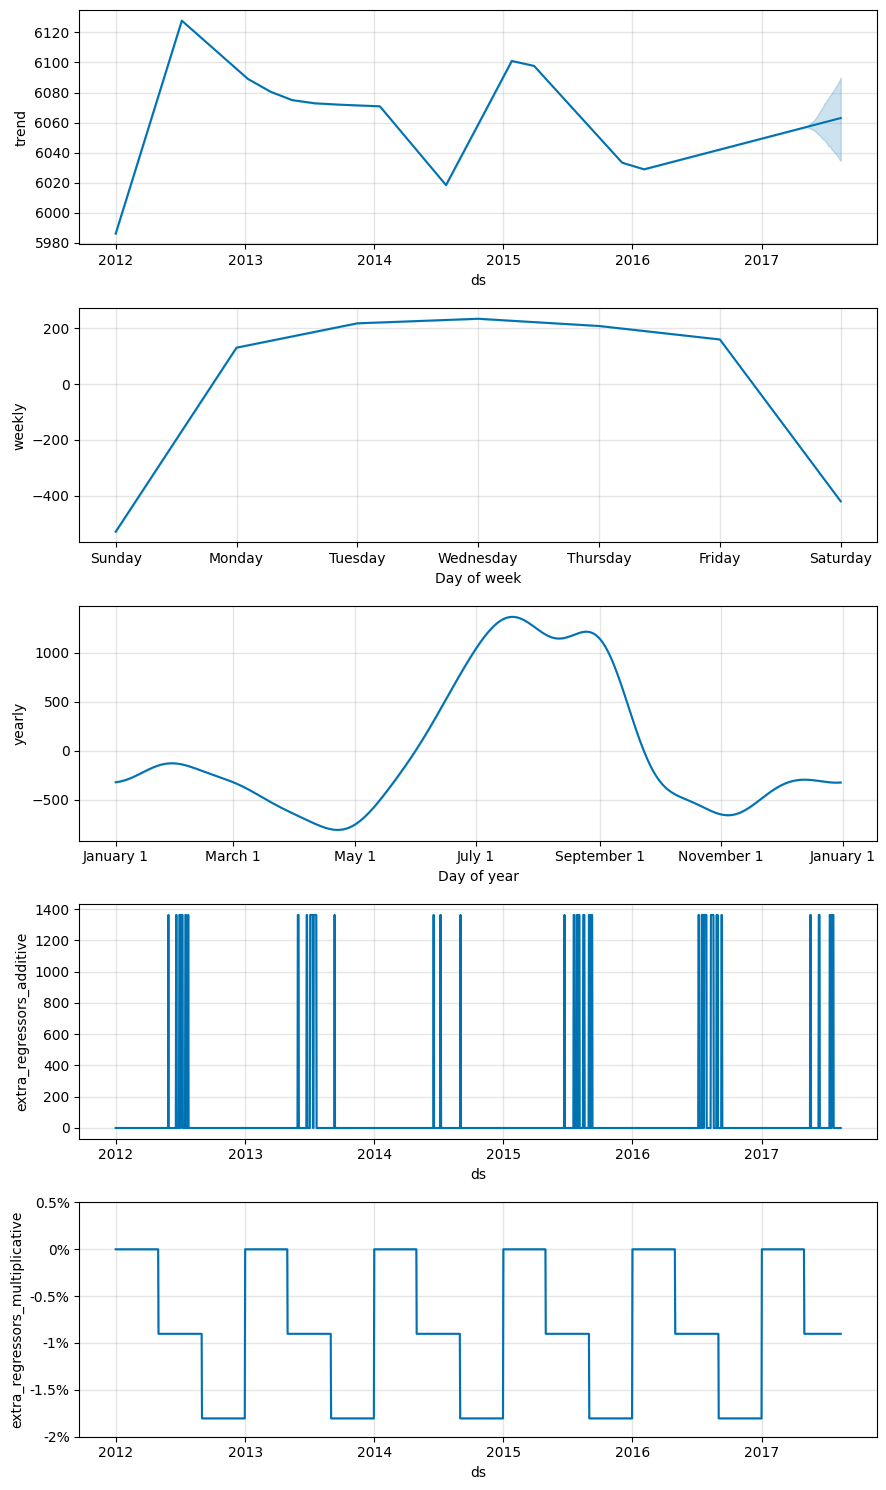

In [30]:
fig2 = model.plot_components(forecast)

In [31]:
from prophet.diagnostics import cross_validation,performance_metrics

cv_results = cross_validation(model = model,initial = '731 days',horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpydro4e1o/xhb3_muv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpydro4e1o/fue_uciu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61909', 'data', 'file=/tmp/tmpydro4e1o/xhb3_muv.json', 'init=/tmp/tmpydro4e1o/fue_uciu.json', 'output', 'file=/tmp/tmpydro4e1o/prophet_modelklv15zf8/prophet_model-20250203151307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:13:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpydro4e1o/349iuct0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpydro4e1o/ta0l38qf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  205144.398320  452.928690  353.918615  0.062791   
1    37 days 00:00:00  211254.317663  459.624105  360.937536  0.063974   
2    37 days 12:00:00  212494.253675  460.970990  363.200820  0.064354   
3    38 days 00:00:00  216540.207728  465.338810  367.078276  0.064735   
4    38 days 12:00:00  218736.577588  467.692824  370.874146  0.065335   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  158668.692289  398.332389  336.977980  0.061706   
654 363 days 12:00:00  159192.231510  398.989012  336.726447  0.061662   
655 364 days 00:00:00  162341.376539  402.916091  339.486481  0.062379   
656 364 days 12:00:00  161835.848250  402.288265  338.268715  0.062180   
657 365 days 00:00:00  156326.179581  395.381056  334.127000  0.061840   

        mdape     smape  coverage  
0    0.051251  0.062559  0.895604  
1    0.051500  0.063705  0.884615  
2    0.051857  0.064101  0.884615  
3    0.053173  0.064492  0.879121  
4    0.054417  0.065110  0.879121  
..        ...       ...       ...  
653  0.061268  0.061553  0.978022  
654  0.061268  0.061557  0.978022  
655  0.062296  0.062293  0.972527  
656  0.061933  0.062132  0.972527  
657  0.062296  0.061705  0.978022  

[658 rows x 8 columns]

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



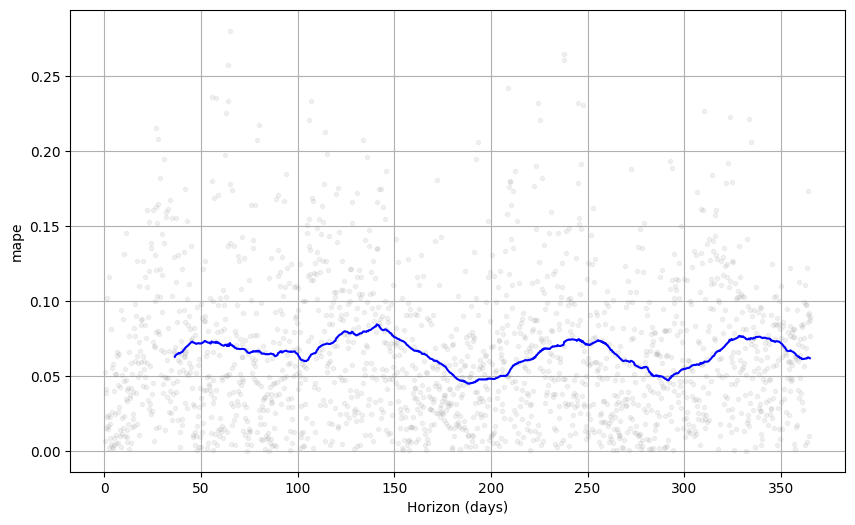

In [32]:
from prophet.plot import plot_cross_validation_metric

fig3 = plot_cross_validation_metric(cv_results,metric='mape')

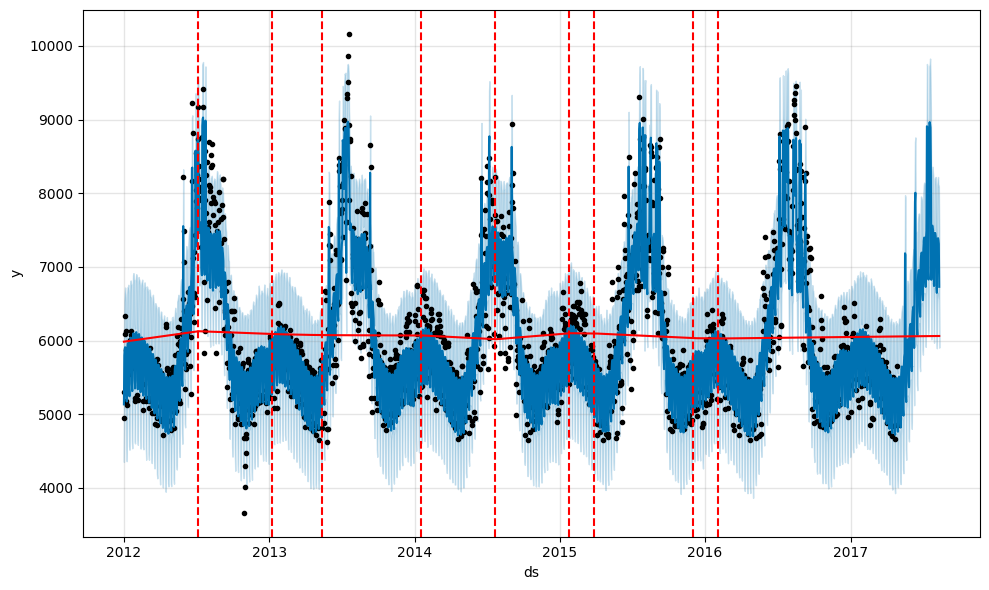

In [33]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast)

In [34]:
deltas = model.params['delta'].mean(0)
deltas

array([-6.08473e-08, -1.74291e-04, -1.84798e-01, -1.10365e-06,
        2.80869e-08,  1.40912e-02,  8.05194e-03,  1.10844e-02,
        3.89223e-03,  8.65245e-04, -2.12610e-08, -5.18877e-02,
        6.31308e-09,  1.87150e-06,  1.38317e-01,  6.01324e-04,
       -6.72531e-08, -9.52036e-02, -3.95509e-02,  2.17609e-07,
        1.86624e-07, -1.59191e-07,  3.58926e-02,  2.53746e-02,
        9.95629e-07])

In [35]:
range(len(deltas))

range(0, 25)

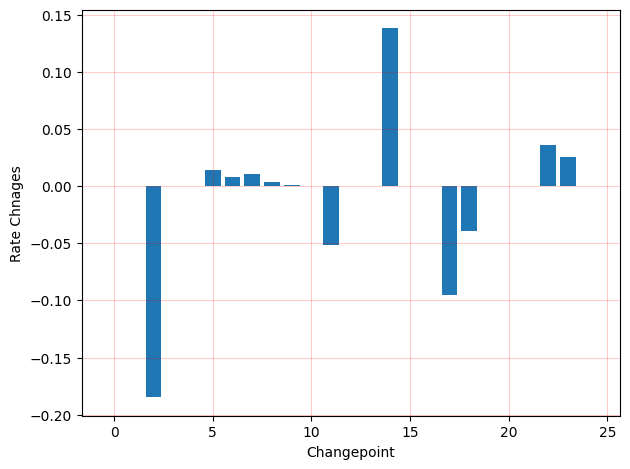

In [36]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points

In [37]:
model.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]